In [1]:
import torch
import torch.nn as nn
import numpy as np

In [13]:
x = torch.linspace(-3, 3, 200).unsqueeze(1)
y = x**2 + 4 + torch.randn_like(x)

# using linear space to get evenly spaced disitribution and its output is its square plus 4 plus a random number like itself? (same shape?)

In [15]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)
        

In [20]:
model = MyModel()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)
epochs = 1500

In [26]:
for epoch in range(epochs):
    pred = model(x)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Weight: {model.net[0].weight, model.net[2].weight}")
        #print(f"Bias: {model.bias.item()}")
        print(f"Loss: {loss.item()}")

Weight: (Parameter containing:
tensor([[-0.6927],
        [ 0.2429],
        [ 0.8625],
        [-0.8970],
        [ 0.3846],
        [ 0.7826],
        [ 0.6598],
        [-0.0156],
        [ 0.4279],
        [-0.9029],
        [-0.1420],
        [-0.7499],
        [-0.7479],
        [-0.8278],
        [-0.1865],
        [ 0.6802]], requires_grad=True), Parameter containing:
tensor([[-0.1261, -0.0162, -0.0226,  0.1718,  0.1071,  0.0175, -0.1868, -0.0354,
          0.1865, -0.0966,  0.0107,  0.2857,  0.2703,  0.1513,  0.0124,  0.1634]],
       requires_grad=True))
Loss: 46.49479675292969
Weight: (Parameter containing:
tensor([[-0.5798],
        [ 0.6037],
        [ 1.1814],
        [-1.3073],
        [ 0.8904],
        [ 1.2360],
        [ 0.4831],
        [ 0.4224],
        [ 0.9637],
        [-0.8584],
        [-0.1420],
        [-1.1375],
        [-1.1421],
        [-1.2457],
        [-0.5570],
        [ 1.1586]], requires_grad=True), Parameter containing:
tensor([[0.1722, 0.3676, 0

In [27]:
import matplotlib.pyplot as plt

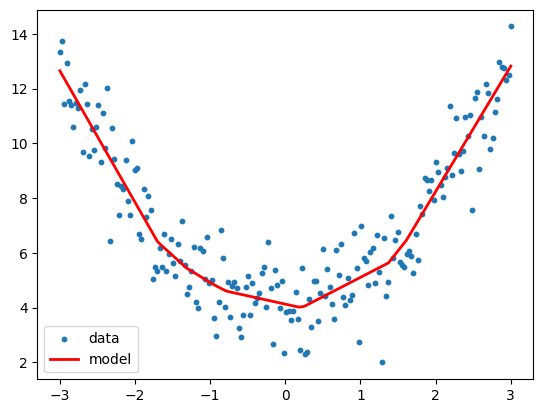

In [31]:
with torch.no_grad():
    y_pred = model(x)

plt.scatter(x.numpy(), y.numpy(), s=10, label="data")
plt.plot(x.numpy(), y_pred.numpy(), color="red", lw=2, label="model")
plt.legend()
plt.show()